# Introduction
In this project, we will see how to train a logistic regression model. This is intended as an introduction to logistic regression. However, we will not go through the mathematical intuition of the model.

We will be working with the Breast Cancer dataset, which contains some very detailed measurements of cells. Along with each observation of measurements, we have the diagnosis of the cell (malignant or not). Our goal is to train a model that will be able to predict whether or not a given cell is malignant given only its measurements.

![My Image](pexels-photo-5483017.jpeg)

### Import libraries (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , auc , accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier as dc

### Load the dataset

In [2]:
df=pd.read_csv("Breast Cancer.csv")

### Inspect basic info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Drop unnecessary column

In [6]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df=df.reset_index(drop=True)

### Convert diagnosis labels: M → 1, B → 0

In [7]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Convert diagnosis column to categorical type

In [9]:
df["diagnosis"]=df["diagnosis"].astype("category")

### Display updated datatypes of all columns

In [10]:
df.dtypes

diagnosis                  category
radius_mean                 float64
texture_mean                float64
perimeter_mean              float64
area_mean                   float64
smoothness_mean             float64
compactness_mean            float64
concavity_mean              float64
concave points_mean         float64
symmetry_mean               float64
fractal_dimension_mean      float64
radius_se                   float64
texture_se                  float64
perimeter_se                float64
area_se                     float64
smoothness_se               float64
compactness_se              float64
concavity_se                float64
concave points_se           float64
symmetry_se                 float64
fractal_dimension_se        float64
radius_worst                float64
texture_worst               float64
perimeter_worst             float64
area_worst                  float64
smoothness_worst            float64
compactness_worst           float64
concavity_worst             

### Bar plot of class distribution (Benign vs Malignant)

[Text(0, 0, '357'), Text(0, 0, '212')]

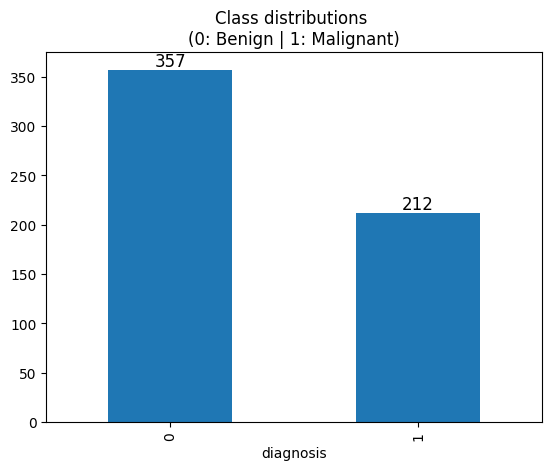

In [11]:
plot = df['diagnosis'].value_counts().plot(kind='bar', title="Class distributions \n(0: Benign | 1: Malignant)")
plot.bar_label(plot.containers[0], fmt="%.0f", fontsize=12)

###  Split features and labels; scale feature values

In [12]:
y=df['diagnosis']
X=df.drop('diagnosis',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

###  Train-test split (70% training, 30% testing)

In [13]:
X_train, X_test, y_train, y_test= train_test_split(x_scaled,y,random_state=1,test_size=0.3)

### Train Logistic Regression model

In [14]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Predict on test data using the model

In [15]:
y_pred=model.predict(X_test)

### Display Confusion Matrix for test predictions

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[105   3]
 [  2  61]]


In [17]:
accuracy_score(y_test,y_pred)

0.9707602339181286

### Print classification report for predictions

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
fpr,tpr,_ =roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
roc_df=pd.DataFrame({"Threshold": _, "FPR": fpr, "TPR": tpr})

### Plot ROC Curve

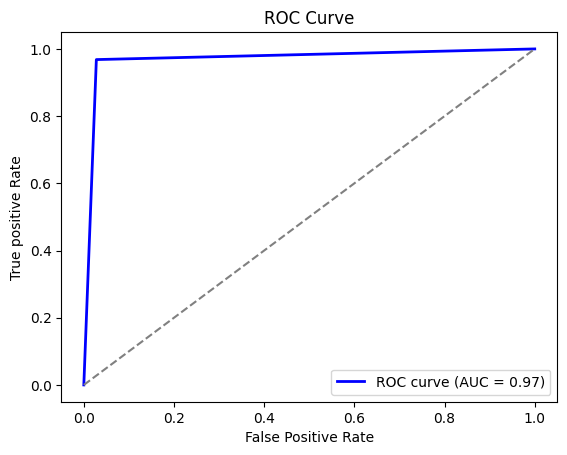

In [20]:
plt.plot(fpr,tpr,color="b",lw=2,label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### Missclassification Report 

In [21]:
df_results=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df_results['Misclassified']= df_results['Actual'] != df_results['Predicted']

In [22]:
class_count=df_results.groupby('Actual')['Misclassified'].value_counts()

C:\Users\varsh\AppData\Local\Temp\ipykernel_7176\1736336329.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_count=df_results.groupby('Actual')['Misclassified'].value_counts()


In [23]:
print(class_count)

Actual  Misclassified
0       False            105
        True               3
1       False             61
        True               2
Name: count, dtype: int64


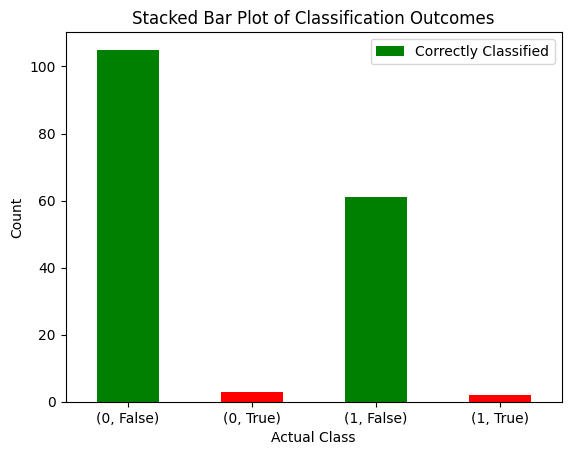

In [24]:
class_count.plot(kind="bar", stacked=True, color=["green", "red"])
plt.xlabel("Actual Class")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Classification Outcomes")
plt.legend(["Correctly Classified","Misclassified"])
plt.xticks(rotation=0)
plt.show()

### Compare model against dummy classifier (baseline)

In [25]:
dummy_classifier= dc(strategy="most_frequent")
dummy_classifier.fit(X_train,y_train)
dummy_pred=dummy_classifier.predict(X_test)
score=accuracy_score(y_test,dummy_pred)
score1=accuracy_score(y_test,y_pred)
print("Accuracy of Dummy Classifier:{:.4f}".format(score))
print("Accuracy of Logistic Regression:{:.4f}".format(score1))

Accuracy of Dummy Classifier:0.6316
Accuracy of Logistic Regression:0.9708


In [27]:
y_train_pred=model.predict(X_train)

In [28]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       249
           1       0.99      0.98      0.99       149

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



### Print optimal threshold values (J, KS, SAS methods)

In [30]:
# Compute Youden's J statistic (J = TPR - FPR)
youden_j = tpr - fpr
best_j_index = np.argmax(youden_j)  # Index of max J
best_j_threshold = _[best_j_index]  # Best threshold using J-statistic

# Compute KS Statistic (max distance between TPR and FPR)
ks_statistic = np.max(tpr - fpr)
best_ks_index = np.argmax(tpr - fpr)  # Index of max KS distance
best_ks_threshold = _[best_ks_index]  # Best threshold using KS statistic

# SAS Method (Threshold where both TPR & FPR are high)
best_sas_index = np.argmax(tpr + fpr)  # Index where sum of TPR and FPR is highest
best_sas_threshold = _[best_sas_index]  # Best threshold for SAS method


In [31]:
print("Optimal Thresholds:")
print(f"Youden's J: {best_j_threshold:.2f}")
print(f"Kolmogorov-Smirnov (KS) Statistic: {best_ks_threshold:.2f}")
print(f"SAS Method (Max TPR + FPR): {best_sas_threshold:.2f}")


Optimal Thresholds:
Youden's J: 1.00
Kolmogorov-Smirnov (KS) Statistic: 1.00
SAS Method (Max TPR + FPR): 0.00
